# 선형 회귀 (Linear Regression)
* k-최근접 이웃 회귀와 선형 회귀 알고리즘의 차이 이해
* 사이킷런을 사용해 여러 가지 선형 회귀 모델 생성

### 지난 시간에

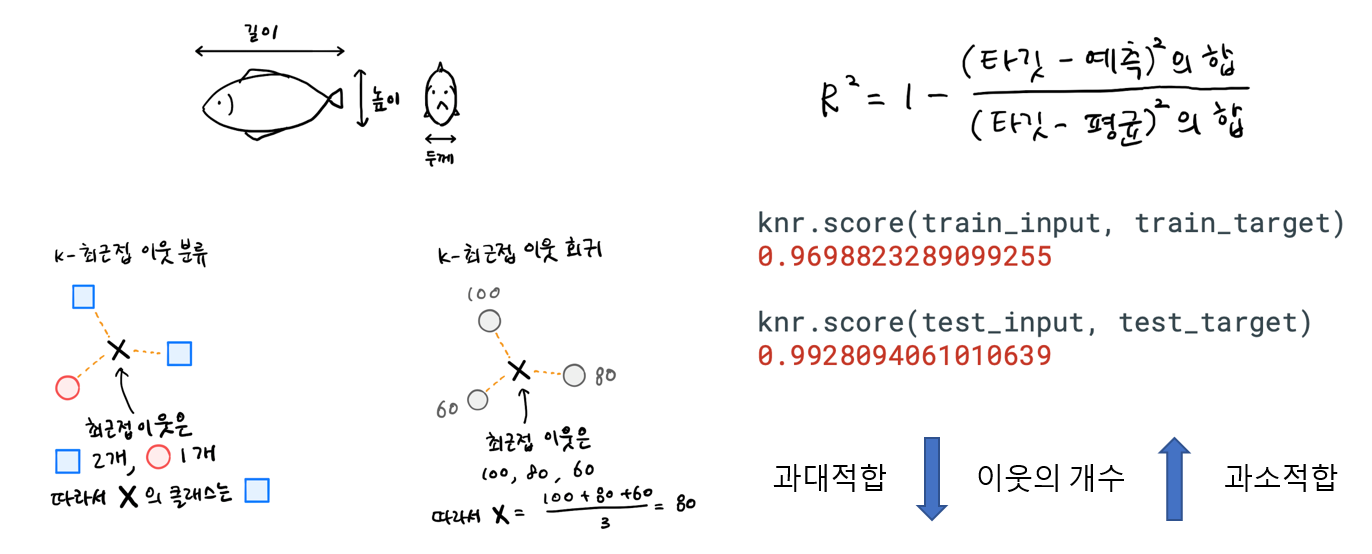

### k-최근접 이웃 회귀 모델의 한계

* 50cm 길이의 농어의 무게 예측을 제대로 할까?

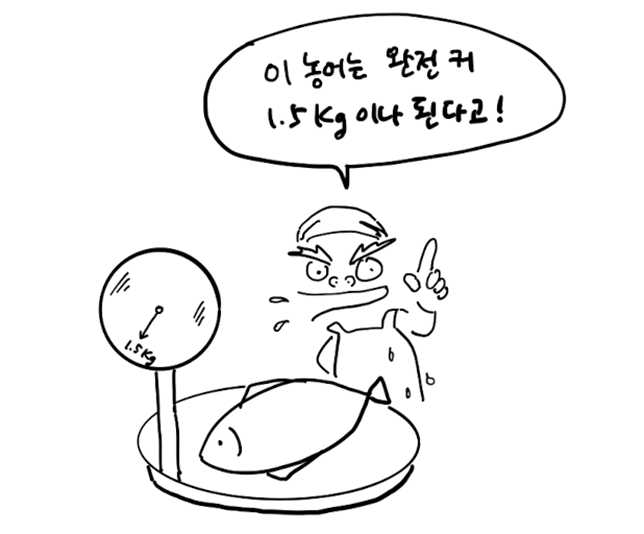

* [코드복사]http://bit.ly/perch_data

In [51]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

* 훈련 세트와 테스트 세트로 분리

In [53]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세ㄹ트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1 ,1)

* 최근접 이웃 개수를 3으로 하는 모델 훈련

In [55]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

* 길이가 50cm인 농어의 무게 예측
  - 1,033g 정도로 예측했으나 실제 농어의 무게는 1.5kg

In [57]:
knr.predict([[50]])

array([1033.33333333])

In [58]:
knr.predict([[100]])

array([1033.33333333])

* 산점도 그래프를 이용하여 훈련 세트와 50cm 농어, 이 농어의 최근접 이웃을 시각화

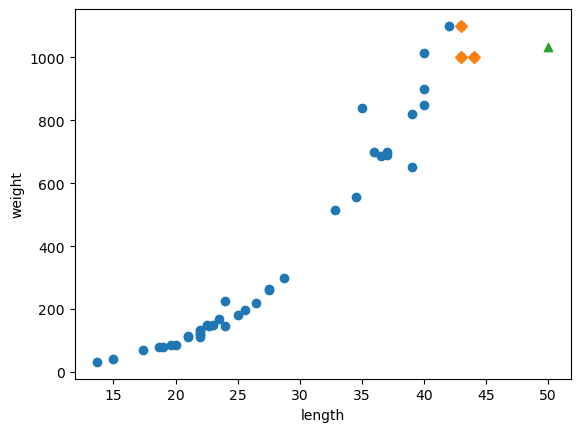

In [60]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker ='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

* 50cm 농어와 가장 가까운 이웃은 45cm 근방의 농어 ==> 50cm 농어의 무게는 45cm 근방 농어의 무게 평균으로 계산

In [62]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [63]:
print(knr.predict([[100]]))

[1033.33333333]


* **k-최근접 이웃 회귀 알고리즘의 문제**
  - 새로운 샘플이 훈련 세트의 범위를 벗어나면 엉뚱한 값을 예측할 수 있음

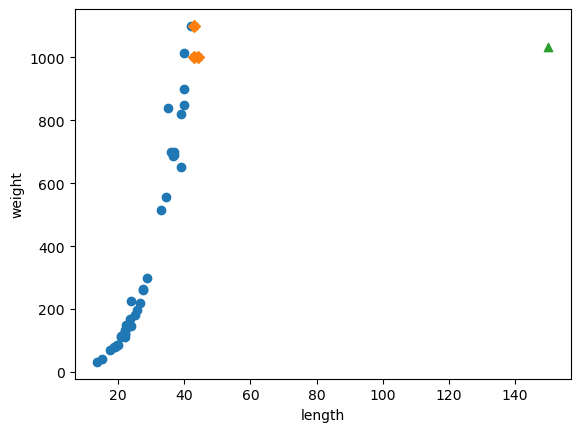

In [65]:
import matplotlib.pyplot as plt

# 100cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[150]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(150, 1033, marker ='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 선형 회귀(Linear Regression)
* 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘
* 간단하면서도 강력한 예측 모델로, 데이터 간의 선형 관계를 분석하는 기본적인 도구

---
* 단순 선형 회귀: y = β₀ + β₁x
* 다중 선형 회귀: y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ
  - `β₀`는 절편(intercept)  
- `β₁, β₂, ..., βₙ`은 각 입력 변수의 계수(coefficients)

---
* 농어의 특성을 가장 잘 나타내는 직선은 어떤 직선일까?

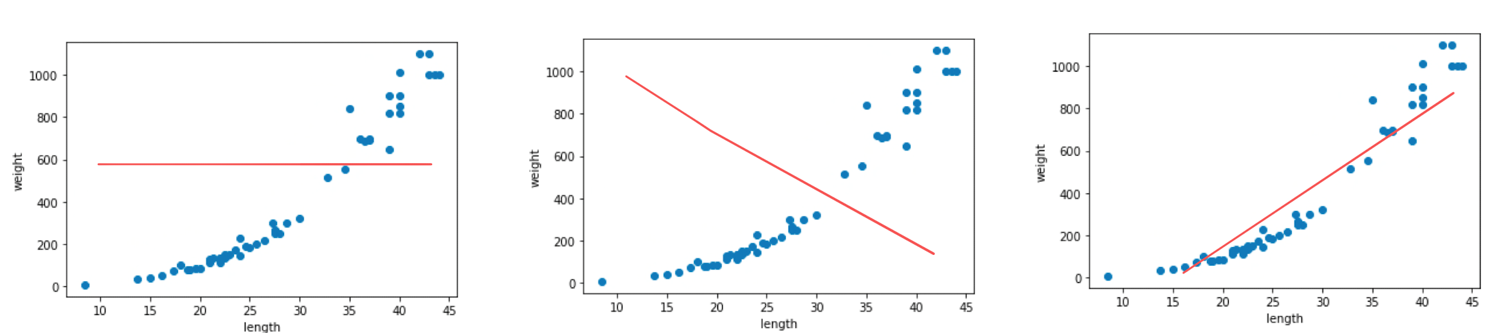

* 선형회귀를 이용하여 입력된 농어의 길이에 대응하는 농어의 무게를 찾는 방법
  - 사이킷런의 **LinearRegression 클래스를 이용하여 직선의 방정식 찾기**
 
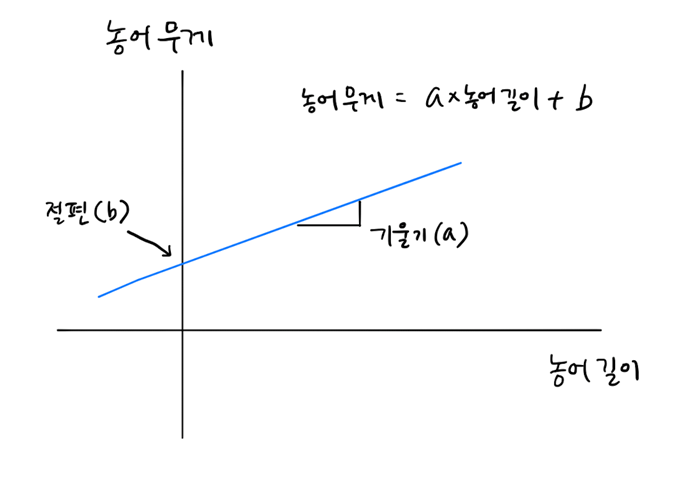

In [74]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)


LinearRegression()

In [80]:
lr.score(train_input, train_target)

0.939846333997604

In [82]:
print(lr.predict([[50]]))

[1241.83860323]


* LinearRegression 클래스가 찾은 기울기와 절편을 저장하는 속성
  - lr.coef_ : 기울기
  - lr.intercept_ : 절편

In [84]:
lr.coef_,lr.intercept_

(array([39.01714496]), -709.0186449535477)

#### 학습한 직선의 시각화

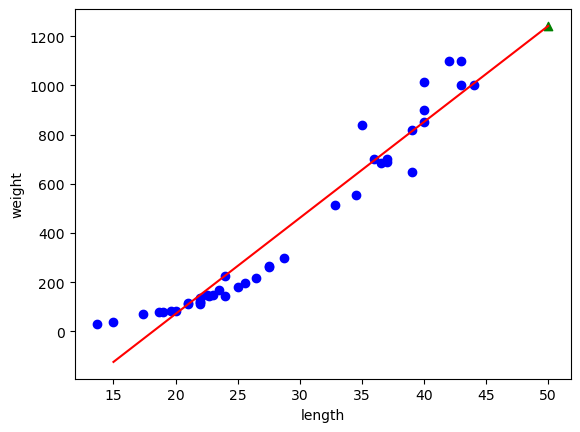

In [98]:
# 훈련 세트의 산점도를 그린다
plt.scatter(train_input, train_target, color = 'blue')
# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_],color = 'red')
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^',color = 'green')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

* 훈련 세트와 테스트 세트에 대한 $ R^2$ 점수 확인

In [100]:
lr.score(train_input, train_target)

0.939846333997604

In [102]:
lr.score(test_input, test_target)

0.8247503123313558

#### 위 그래프에서 어떤 문제가 있을까?
* 훈련 세트와 테스트 세트의 점수가 둘 다 좋지 않은 과소 적합 문제 발생
* 절편이 음수가 나와서 길이가 0보다 큰데 무게가 음수가 나오는 문제 발생

### 다항 회귀(Polynomial Regression)
* 선형 회귀의 확장으로, 입력 변수와 출력 변수 사이의 비선형 관계를 모델링하기 위해 다항식 형태의 함수를 사용
* 데이터가 단순 선형 관계를 넘어서 비선형적인 특성을 보일 때 효과적

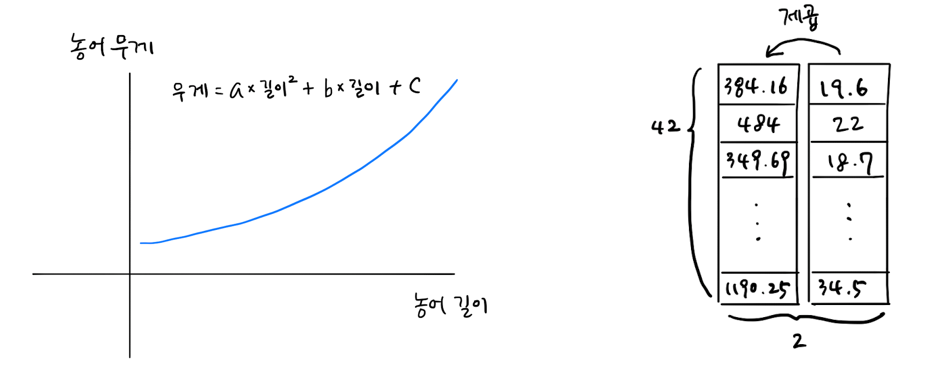

In [107]:
train_poly = np.column_stack((train_input **2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [109]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


* train_poly를 사용하여 선형 회귀 모델을 다시 훈련

In [115]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [117]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


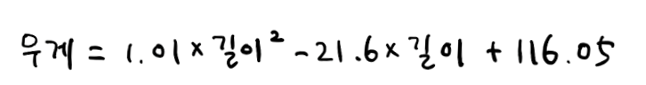

#### 학습한 직선의 시각화

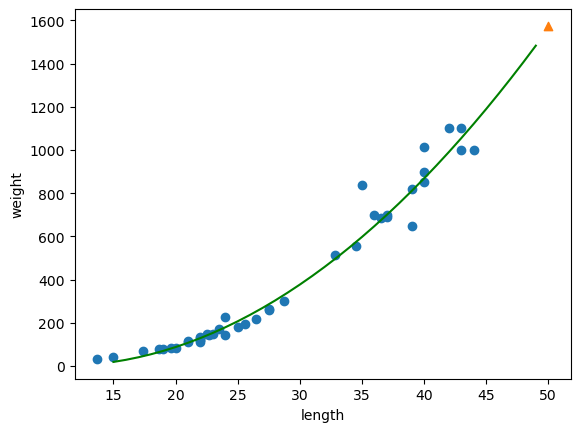

In [124]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05, color = 'green')

# 50cm 농어 데이트
plt.scatter(50, 1574, marker ='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

* 훈련 세트와 테스트 세트에 대한 $ R^2$ 점수 확인
  - 점수는 높아졌지만 훈련 세트보다 테스트 세트의 점수가 더 높음 ==> 과소적합 train < test

In [126]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121
